# Data Pre Processing

### 1.Import the necessary libraries and read the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fifa.csv')

In [3]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### 2.Drop any columns that you deem unecessary for analysis.

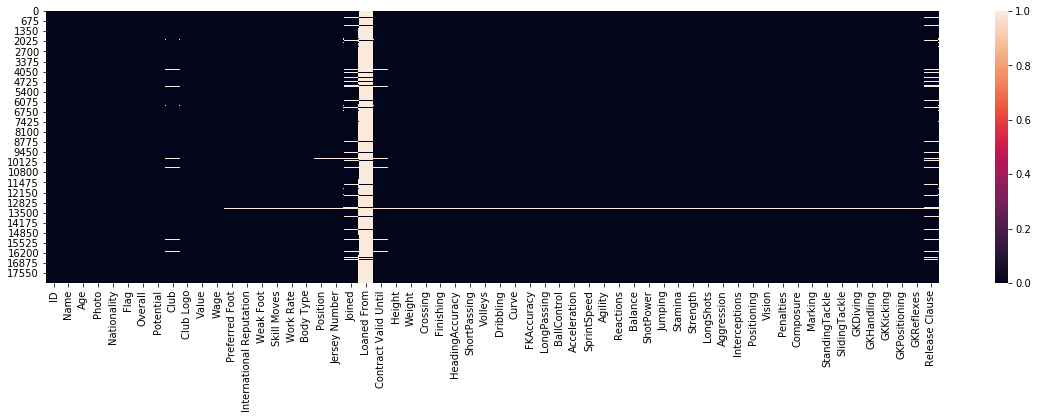

In [4]:
plt.rcParams['figure.figsize'] = (20,5)

sns.heatmap(df.isnull())

plt.show()

In [5]:
(df.isnull().sum()/len(df))['Loaned From']

0.9305761520294392

In [6]:
df.drop(columns='Loaned From',inplace=True)

In [398]:
#Loaned From column is dropped since 93% of the data is null

### 3.The following columns need to be converted for further analysis:


'Value' - Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	
Convert to Float after getting rid of currency symbol and suffix.

'Wage' - Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	
Convert to Float after getting rid of currency symbol and suffix.

'Joined' - Year as a string, in some cases complete date as string	Convert to int with only year

'Contract Valid Until' - Date as a string 	Convert to datetime type

'Height' - In inches with a quotation mark 	Convert to Float with decimal points

'Weight' - Contains the suffix lbs 	Remove the suffix and convert to float

'Release Clause' - Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix.

In [7]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [8]:
def convert_currency(curr):
    if curr == np.NaN:
        return np.NaN
    elif type(curr) == float:
        return curr
    elif curr[-1] == 'M':
        return float(curr[:-1])*1000000
    elif curr[-1] == 'K':
        return float(curr[:-1])*1000
    return curr

In [9]:
df.Value = df.Value.str.strip('€').apply(convert_currency).astype(np.number)

In [10]:
df.Wage = df.Wage.str.strip('€').apply(convert_currency).astype(np.number)

In [11]:
def year_only(year_date):
    try:
        return year_date[-4:]
    except:
        return year_date

In [12]:
df.Joined = pd.to_numeric(df.Joined.apply(year_only))

In [13]:
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [14]:
def height_conv(h):
    try:
        return int(h[0])+(int(h[1])/12)
    except:
        return np.NaN

In [15]:
df.Height = df.Height.str.split("'").apply(height_conv)

In [16]:
df.Weight = df.Weight.str.strip('lbs').astype(np.number)

In [17]:
df['Release Clause'] = df['Release Clause'].str.strip('€').apply(convert_currency).astype(np.number)

### 4.Check for missing values and do a mean imputation where necessary.

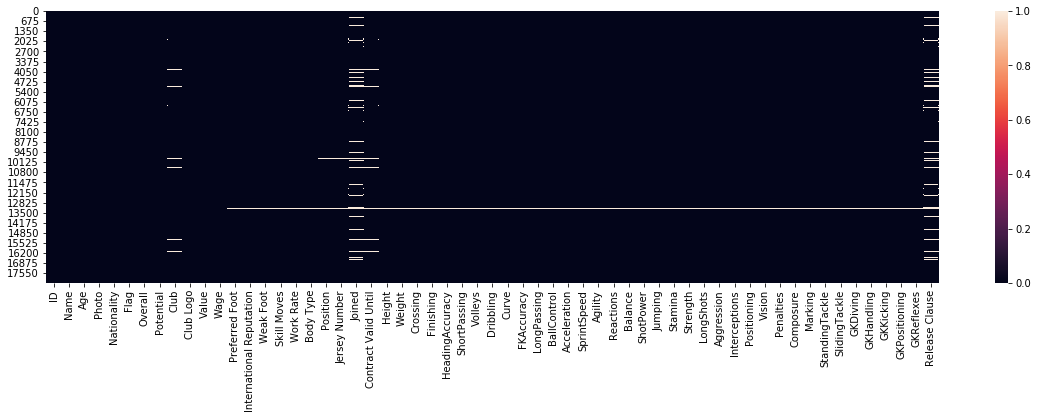

In [18]:
plt.rcParams['figure.figsize'] = (20,5)

sns.heatmap(df.isnull())

plt.show()

In [19]:
df_missing = (df.isnull().sum()/len(df))
df_missing[df_missing > 0]*100

Club                        1.323667
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      8.529686
Contract Valid Until        1.587302
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
Curve                       0.263635
FKAccuracy                  0.263635
LongPassing                 0.263635
BallControl                 0.263635
Acceleration                0.263635
SprintSpeed                 0.263635
Agility                     0.263635
Reactions                   0.263635
B

In [20]:
df['Joined'].fillna(value=int(df.Joined.mean()),inplace=True)

In [21]:
df['Joined'] = df['Joined'].astype('int64')

In [22]:
df['Release Clause'].fillna(value=int(df['Release Clause'].mean()),inplace=True)

In [23]:
pd.to_datetime(df['Contract Valid Until'].mean().date())

Timestamp('2020-03-08 00:00:00')

In [24]:
df['Contract Valid Until'].fillna(value=pd.to_datetime(df['Contract Valid Until'].mean().date()),inplace=True)

In [25]:
df.Club.bfill(inplace=True)

In [26]:
df.Position.fillna(value=df.Position.mode()[0],inplace=True)

In [27]:
df['Jersey Number'].fillna(value=df['Jersey Number'].mode()[0],inplace=True)

In [28]:
df.drop(index=df[df.isnull().sum(axis=1) > 0].index,inplace=True)

# Exploratory Data Analysis

### 1) Plot the distribution of Overall rating for all players.

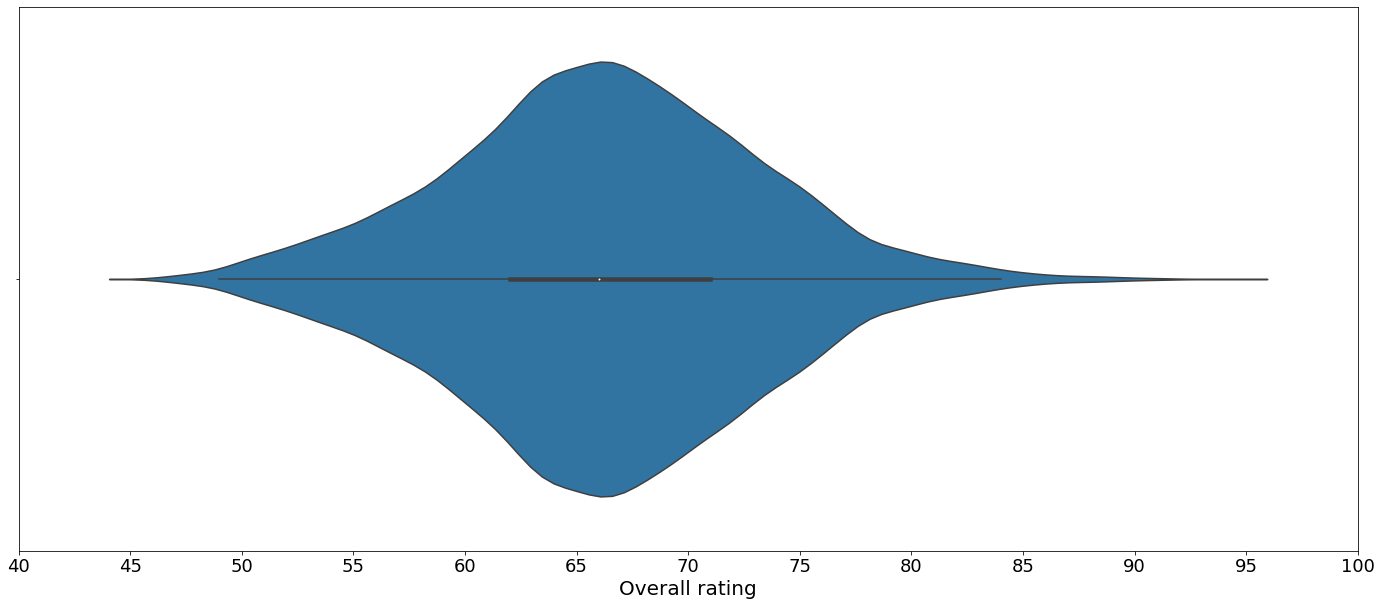

In [29]:
plt.rcParams['figure.figsize'] = (24,10)

sns.violinplot(df.Overall)
plt.xticks(range(40,105,5),fontsize=18)
plt.xlabel('Overall rating',fontsize=20)
plt.xlim(40,100)

plt.show()

### 2) Generate pair plots for the following variables:
#### Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [30]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

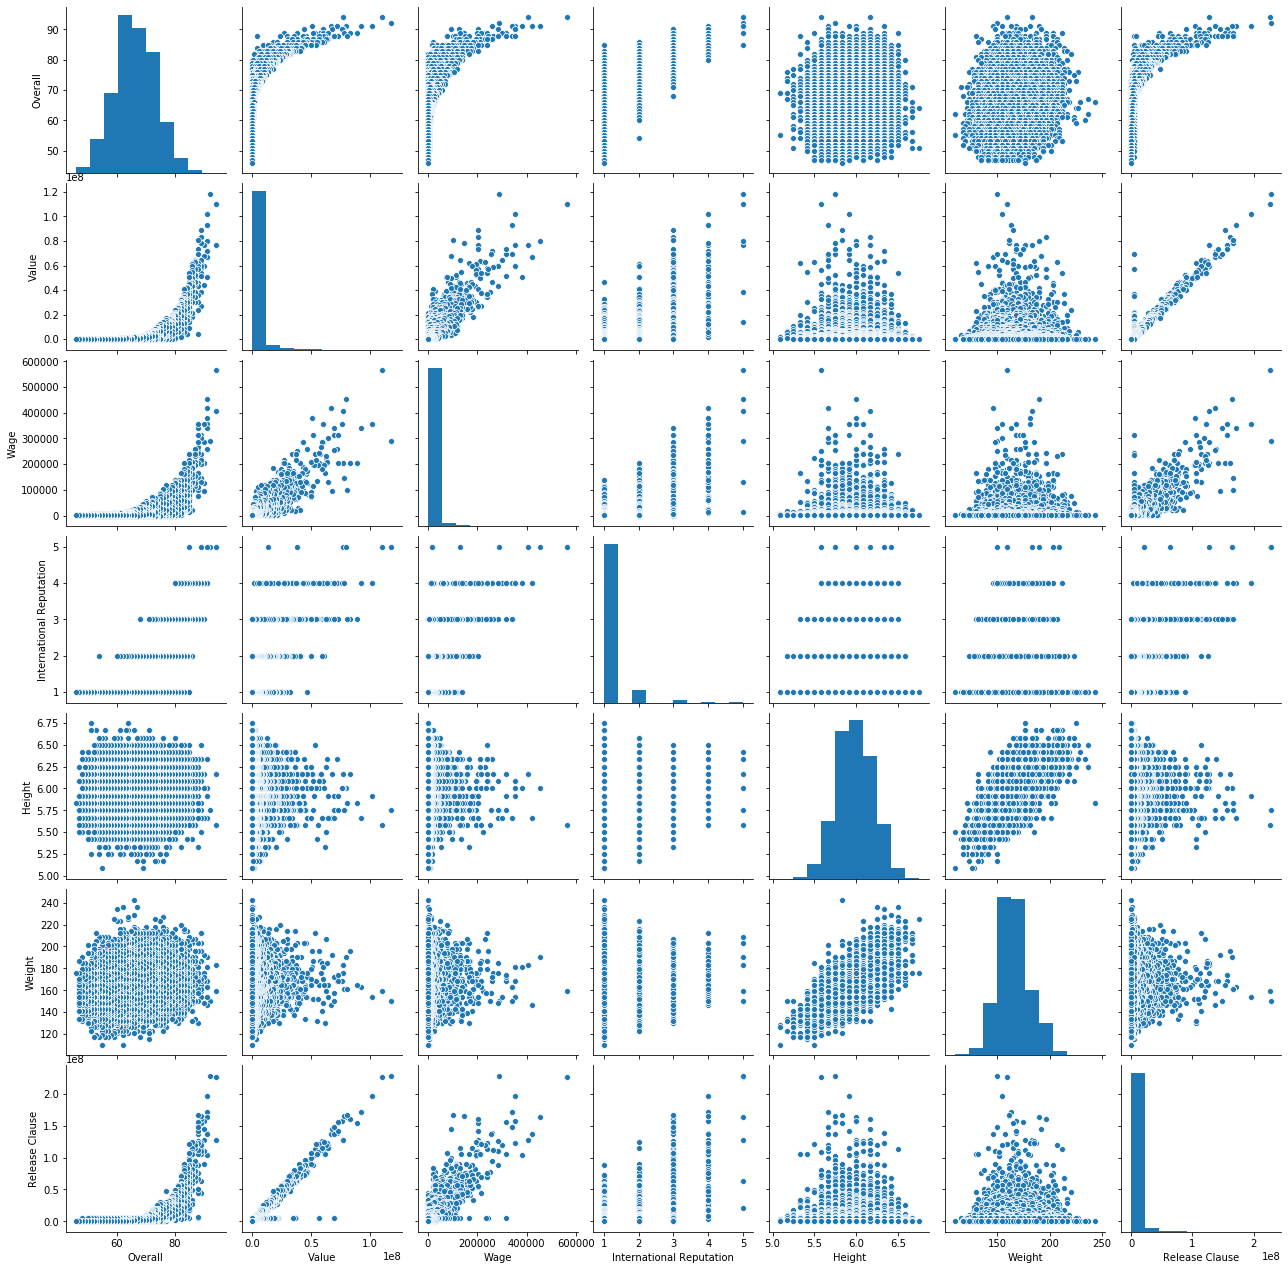

In [31]:
sns.pairplot(df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']])

plt.show()

### 3.Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [32]:
df_2020 = df[df['Contract Valid Until'] < '2021-01-01'].copy()
df_2020['Overall_Rank'] = df_2020[['Overall','Value']].apply(tuple,axis=1).rank(ascending=False,method='min')
#assumed if overall score is same for two players rank will be based on Value column to get exactly 20 players

In [426]:
df_top20 = df_2020[df_2020['Overall_Rank'] <= 20]

#### a)What would the average wage for this set of players be?


Average wage of these players is 220100.0


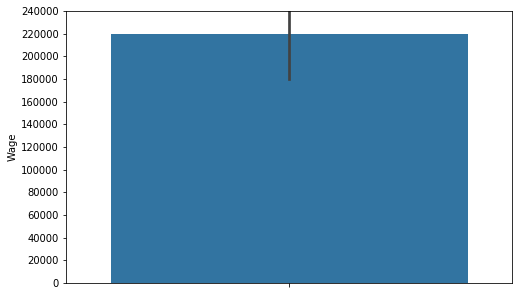

In [427]:
print('Average wage of these players is',df_top20.Wage.mean())
plt.rcParams['figure.figsize'] = (8,5)
sns.barplot(y=df_top20.Wage)
plt.yticks(range(0,250000,20000))
plt.ylim(0,240000)
plt.show()

#### b)What is the average age?

Average wage of these players is 30.45


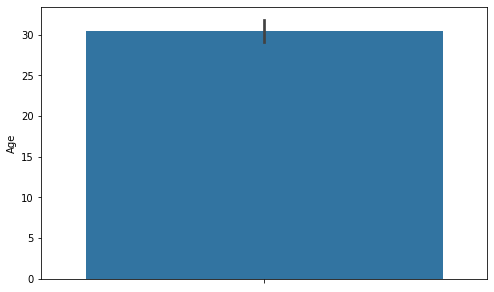

In [428]:
print('Average wage of these players is',df_top20.Age.mean())
plt.rcParams['figure.figsize'] = (8,5)
sns.barplot(y=df_top20.Age)
plt.show()

#### c)Is there a correlation between the Overall rating and Value for these players?

Coefficient of correlaion between Overall rating and Value is 0.5376602976016893


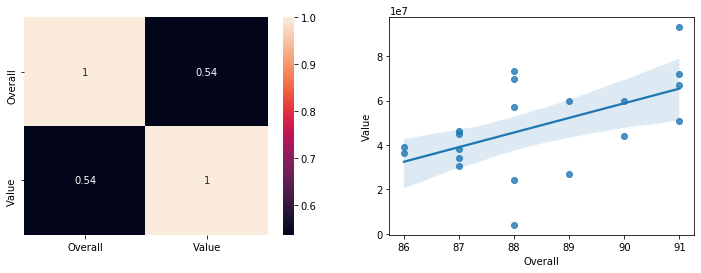

There is a moderate correlaton between Overall rating and Value


In [430]:
print('Coefficient of correlaion between Overall rating and Value is',df_top20['Overall'].corr(df_top20.Value))
plt.rcParams['figure.figsize'] = (12,4)
plt.subplot(1,2,1)
sns.heatmap(df_top20[['Overall','Value']].corr(),annot=True)
plt.subplot(1,2,2)
sns.regplot(x=df_top20['Overall'],y=df_top20['Value'])
plt.show()
print('There is a moderate correlaton between Overall rating and Value')

### 4.Generate tables containing the top 5 players by Overall rating for each unique position.

In [431]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [52]:
tables = dict()
for i in df.groupby('Position'):
    tables[i[0]] = pd.DataFrame(i[1].sort_values(by=['Overall','Value'],ascending=False)['Overall'].rank(ascending=False,method='first'))

In [495]:
df3 = df.sort_values(by=['Position','Overall','Value'],ascending=False)
df['Overall_Position_Rank'] = df3.groupby('Position')['Overall'].rank(ascending=False,method='first')

In [496]:
df_top5_pos = df[df['Overall_Position_Rank'] < 5]

#### a)Are there any players appearing in more than one Table. Please point out such players.

In [500]:
print('No, Players are not appearing in more than one table',df_top5_pos.duplicated(subset=['ID']).sum())

No, Players are not appearing in more than one table 0


#### b)What is the average wage one can expect to pay for the top 5 in every position?

In [503]:
df_top5_pos.groupby('Position')['Wage'].mean().sort_values()

Position
LWB     35750.0
CF      49000.0
RWB     49250.0
RAM     53500.0
LAM     98750.0
RDM    116500.0
CM     133250.0
RM     138000.0
LF     149250.0
LS     149500.0
RS     153250.0
LDM    153500.0
LCB    161250.0
CB     165000.0
CAM    170000.0
RB     173750.0
RF     180750.0
LM     183750.0
RW     198750.0
LB     201250.0
GK     208500.0
LCM    225000.0
CDM    241250.0
RCB    248750.0
LW     277500.0
RCM    278000.0
ST     278750.0
Name: Wage, dtype: float64